In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from xgboost import plot_importance
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [2]:
# Load Data
train_df = pd.read_csv("../input/playground-series-s4e5/train.csv")
test_df = pd.read_csv("../input/playground-series-s4e5/test.csv")

In [3]:
test_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [4]:
print(train_df.head())
display(train_df.columns)

   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   ...  DrainageSystems  CoastalVulner

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [5]:
train_df.dtypes

id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [6]:
train_df.isna().any()

id                                 False
MonsoonIntensity                   False
TopographyDrainage                 False
RiverManagement                    False
Deforestation                      False
Urbanization                       False
ClimateChange                      False
DamsQuality                        False
Siltation                          False
AgriculturalPractices              False
Encroachments                      False
IneffectiveDisasterPreparedness    False
DrainageSystems                    False
CoastalVulnerability               False
Landslides                         False
Watersheds                         False
DeterioratingInfrastructure        False
PopulationScore                    False
WetlandLoss                        False
InadequatePlanning                 False
PoliticalFactors                   False
FloodProbability                   False
dtype: bool

<Axes: >

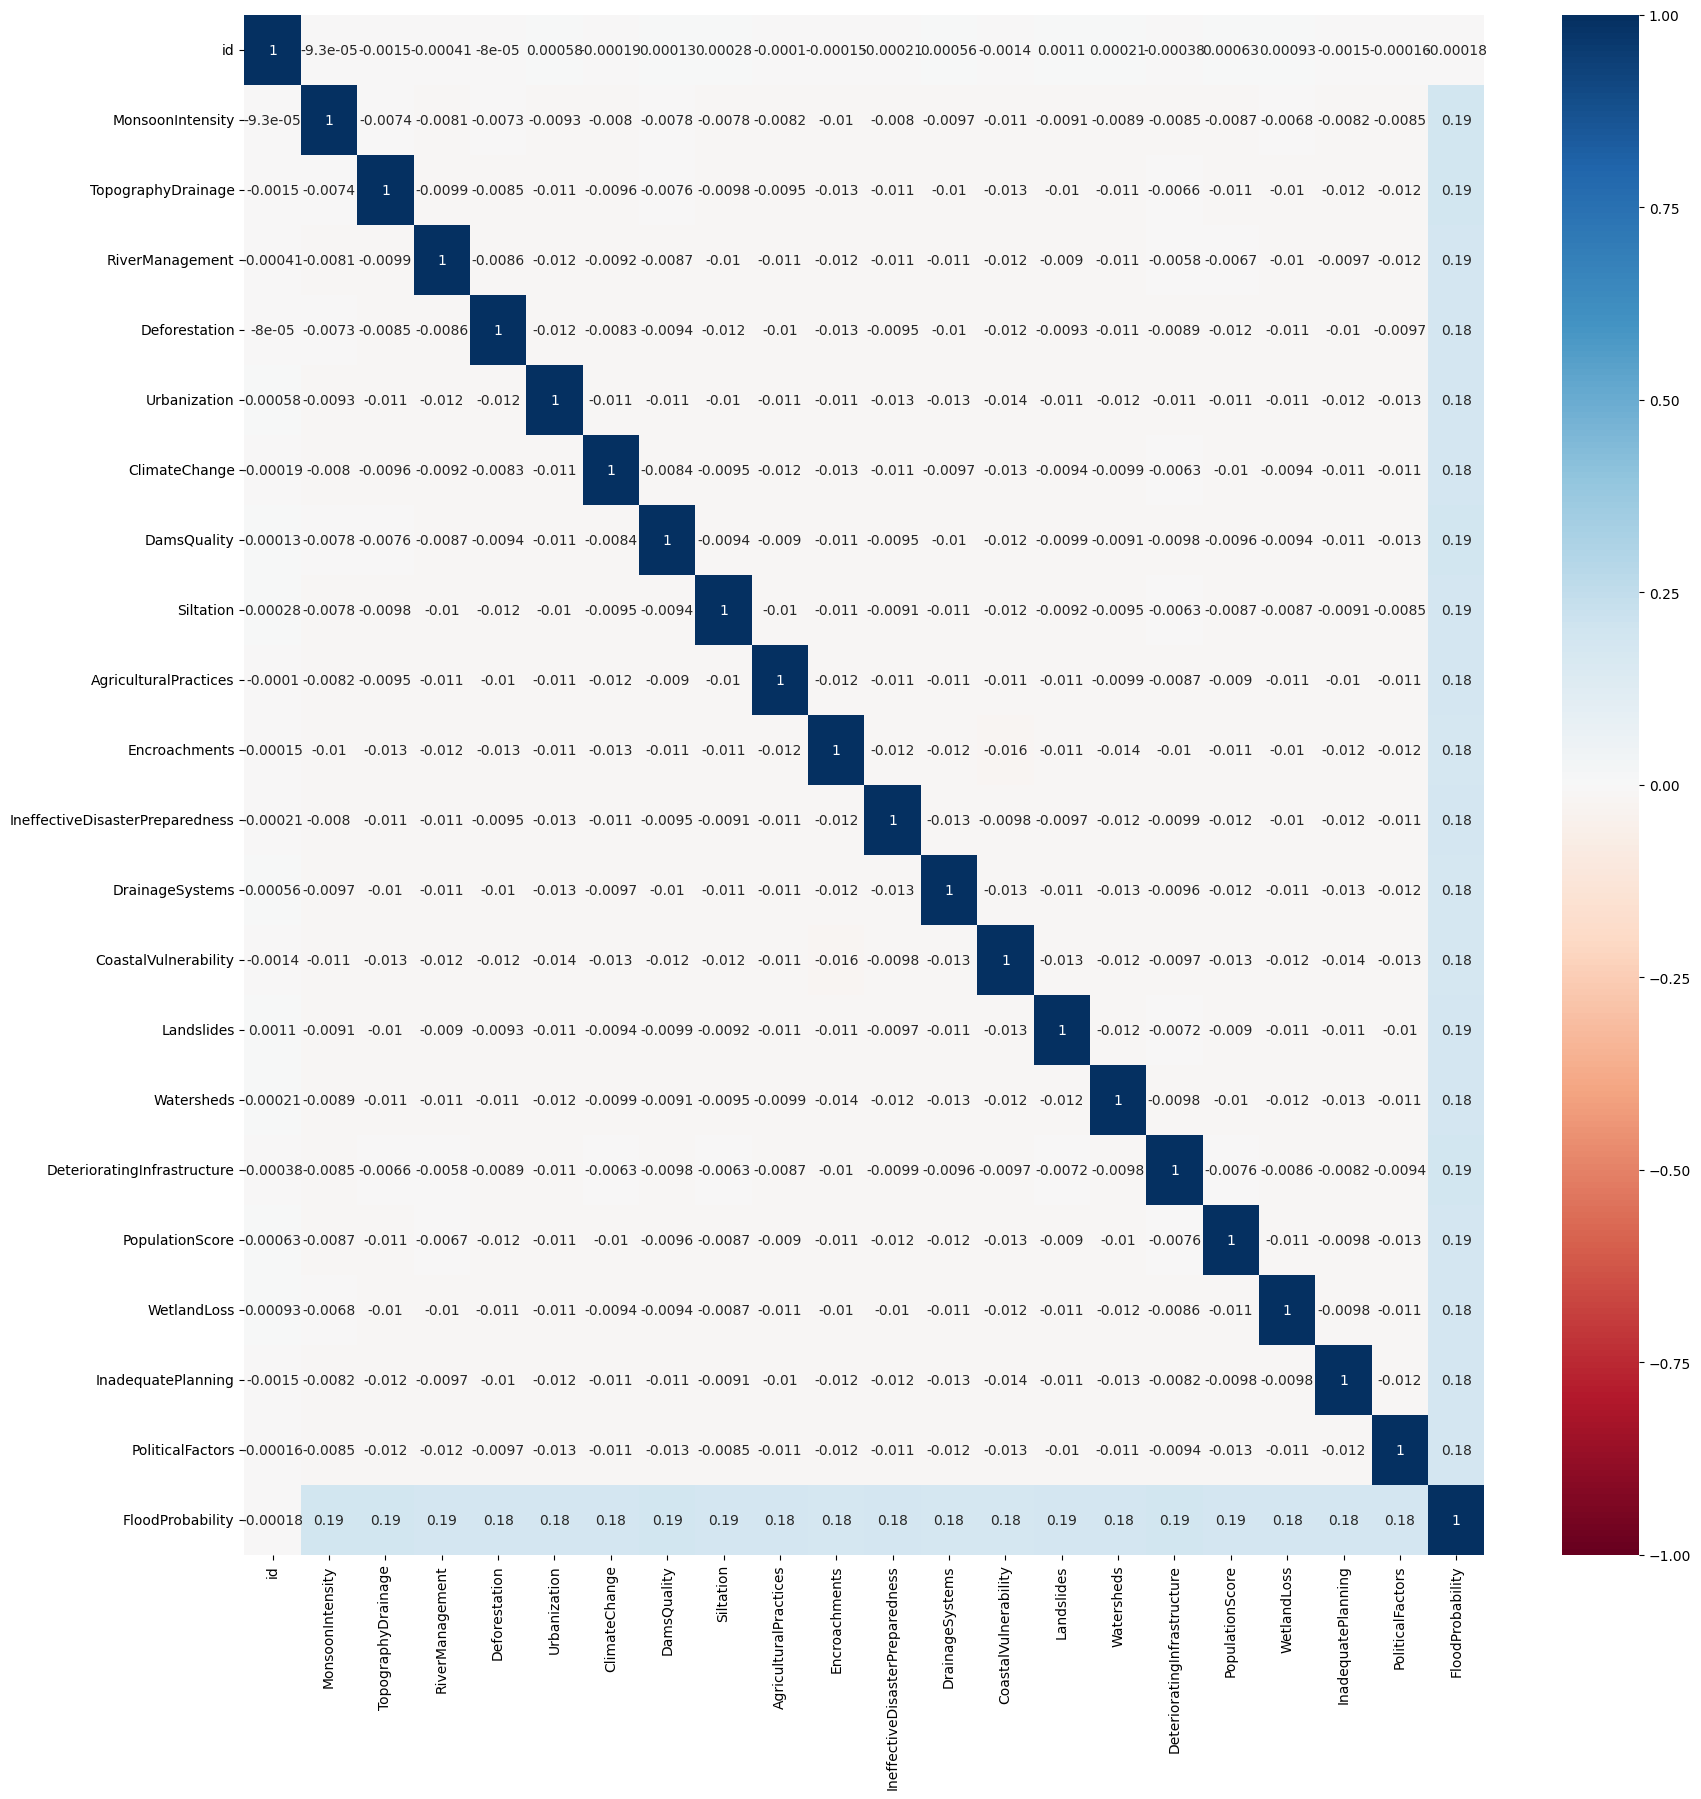

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True)

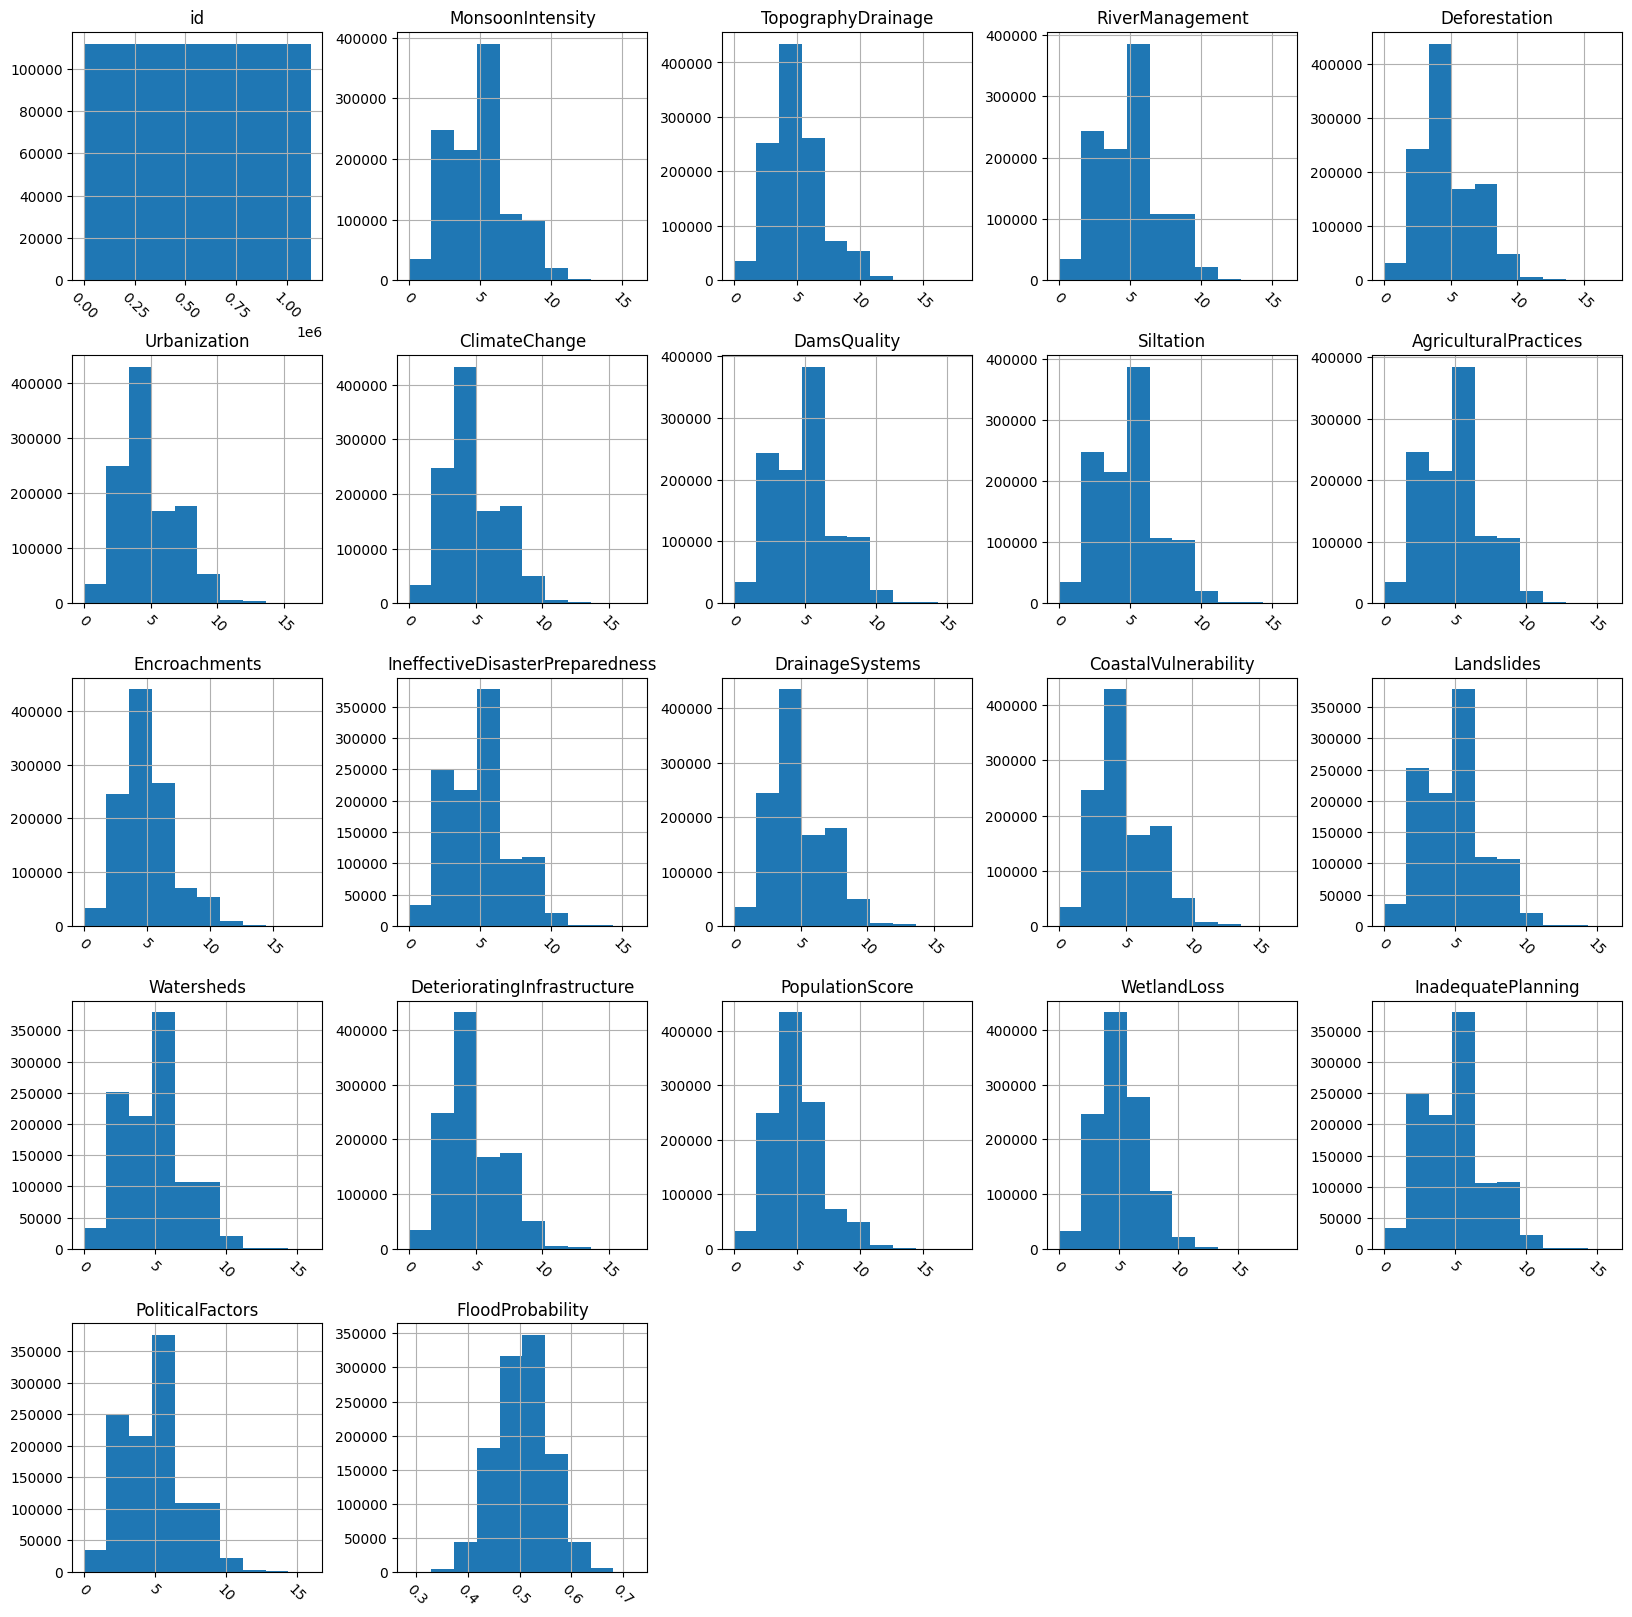

In [8]:
train_df.hist(figsize=(20, 20), xrot=-45)
plt.show()

In [9]:
train_df.nunique()

id                                 1117957
MonsoonIntensity                        17
TopographyDrainage                      19
RiverManagement                         17
Deforestation                           18
Urbanization                            18
ClimateChange                           18
DamsQuality                             17
Siltation                               17
AgriculturalPractices                   17
Encroachments                           19
IneffectiveDisasterPreparedness         17
DrainageSystems                         18
CoastalVulnerability                    18
Landslides                              17
Watersheds                              17
DeterioratingInfrastructure             18
PopulationScore                         19
WetlandLoss                             20
InadequatePlanning                      17
PoliticalFactors                        17
FloodProbability                        83
dtype: int64

In [10]:
train_df.shape

(1117957, 22)

Notes:

1. There are no missing values

2. The data is made of 21 categorical columns that are already encoded as integers and a label column in float

3. The distribution of the columns is a guassian distribution

4. There's no significant correlation between the features.

In [11]:
X = train_df.drop(['FloodProbability', 'id'], axis = 1)
y = train_df['FloodProbability']

In [12]:
# Split data into training and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Mutual Information

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
def drop_uninformative(df, mi_scores, threshold):
    return df.loc[:, mi_scores > threshold]

In [14]:
# mi_scores = make_mi_scores(X, y)

In [15]:
# plt.figure(dpi=100, figsize=(8, 5))
# plot_mi_scores(mi_scores)

In [16]:
# from sklearn.model_selection import cross_val_score

# def score_dataset(X, y, model=XGBRegressor(n_jobs=4, verbosity=2, random_state=1)):
    
#     score = cross_val_score(
#         model, X, y, cv=5, scoring="r2",
#     )
#     score = score.mean()
#     score = np.sqrt(score)
#     return score

In [17]:
def score_valid(X_train, y_train, X_valid, y_valid):
    model=XGBRegressor(n_jobs=4, verbosity=2, random_state=1, early_stopping_rounds = 5)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose = False)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    print(f"R2 Score: {r2}")
    # Get feature importances
    importances = model.feature_importances_
    print(importances)
    
    # Plot feature importances
    plot_importance(model)
    plt.show()
    return model

In [18]:
def score_data(X, y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
    return score_valid(X_train, y_train, X_valid, y_valid)
    

In [19]:
# score_dataset(X, y)

In [20]:
# score_valid(X_train, y_train, X_valid, y_valid)

In [21]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2)
# X_poly_train = poly.fit_transform(X)
# X_t, X_v, y_t, y_v = train_test_split(X_poly_train, y, test_size=0.2, random_state=42)
# score_valid(X_t, y_t, X_v, y_v)


In [22]:
# score_dataset(X_poly_train, y)

In [23]:
df = train_df.copy()
df = df.drop(['FloodProbability', 'id'],axis = 1)

In [24]:
def generate_features(dataset):
    features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']
    
    
    dataset['mean_features'] = 0.1*dataset[features].mean(axis=1)
    dataset['std_features'] = dataset[features].std(axis=1)
    dataset['max_features'] = dataset[features].max(axis=1)
    #dataset['min_features'] = dataset[features].min(axis=1)
    dataset['median_features'] = 0.1*dataset[features].median(axis=1)
    #dataset['range_features'] = dataset['max_features'] - dataset['min_features']
    dataset['variance_features'] = dataset[features].var(axis=1)
    dataset['skewness_features'] = dataset[features].skew(axis=1)
    
    quartiles = dataset[features].quantile([0.25, 0.5, 0.75], axis=1)
    dataset['first_quartile'] = quartiles.loc[0.25]
    dataset['second_quartile'] = quartiles.loc[0.5]
    dataset['third_quartile'] = quartiles.loc[0.75]
    
    kurtosis_features = dataset[features].kurtosis(axis=1)
    dataset['kurtosis_features'] = kurtosis_features
    
    selected_columns = ['Urbanization', 'Deforestation', 'AgriculturalPractices', 'InadequatePlanning']
    dataset['Sum_Selected_Columns'] = dataset[selected_columns].sum(axis=1)
    
    dataset['Urbanization_Deforestation_Interaction'] = dataset['Urbanization'] * dataset['Deforestation']
    dataset['Urbanization_TopographyDrainage_Ratio'] = dataset['Urbanization'] / (dataset['TopographyDrainage'] + 1)
    
    dataset.drop(features, axis=1, inplace=True)
    
    return dataset

In [25]:
new_df = generate_features(df)

In [26]:
t_df = test_df.copy()
new_test = generate_features(t_df)

R2 Score: 0.8686747817972831
[9.8416674e-01 2.1013201e-03 7.7231522e-03 9.5812400e-04 0.0000000e+00
 1.1165113e-03 8.6015038e-04 0.0000000e+00 1.1745683e-03 5.6146667e-04
 4.6146908e-04 4.9592723e-04 3.8046174e-04]


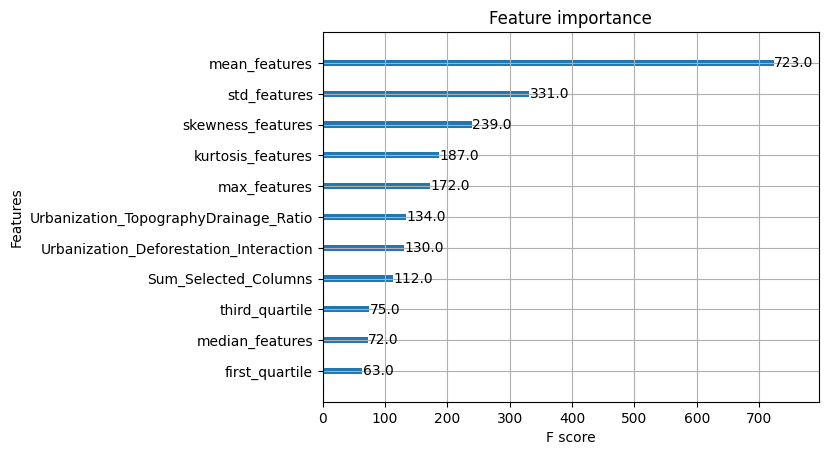

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=4,
             num_parallel_tree=None, random_state=1, ...)

In [27]:
score_data(new_df, y)

In [28]:
mi_scores = make_mi_scores(new_df, y)

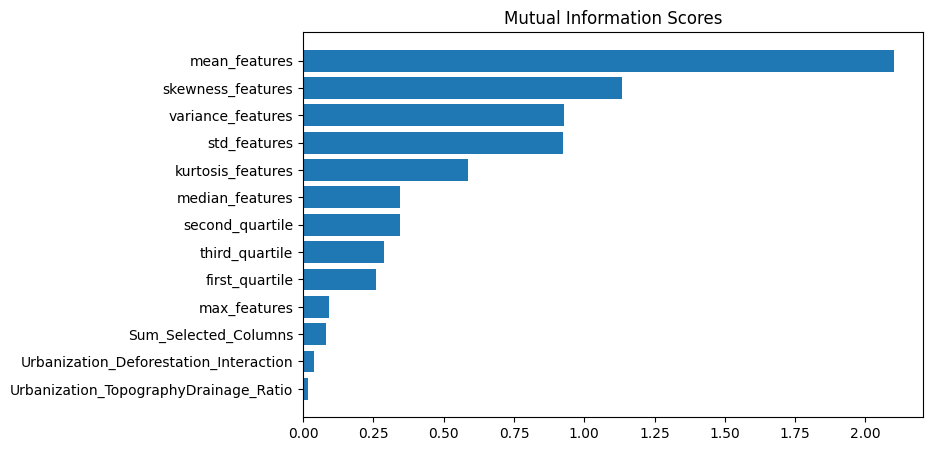

In [29]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [30]:
new_df = drop_uninformative(new_df, mi_scores, 0.5)

In [31]:
new_test = new_test[new_df.columns]

In [32]:
from sklearn.decomposition import PCA
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [33]:
pca, X_pca, loadings = apply_pca(X, standardize=False)

R2 Score: 0.8609353732802845
[0.00555527 0.00165933 0.00405976 0.00361131 0.00300624 0.00122981
 0.00306664 0.00113041 0.00136847 0.00453994 0.00172207 0.0021993
 0.00153338 0.00116909 0.00446385 0.00142869 0.00238202 0.00503716
 0.00530078 0.94553643]


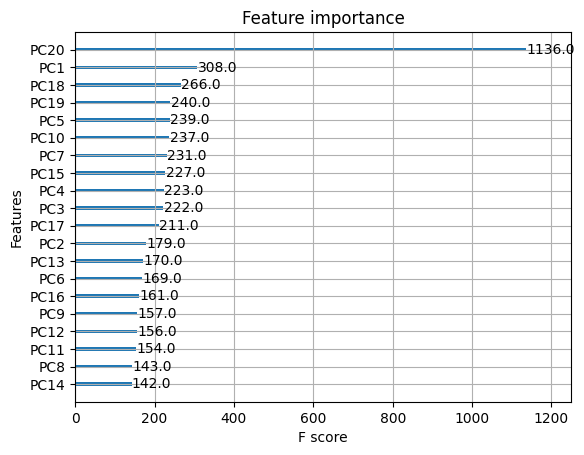

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=4,
             num_parallel_tree=None, random_state=1, ...)

In [34]:
score_data(X_pca, y)

In [35]:
new_df['pc'] = X_pca["PC20"]

/tmp/ipykernel_18/1011094970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['pc'] = X_pca["PC20"]


In [36]:
Z = test_df.drop(['id'], axis = 1)
Z_pca = pca.transform(Z)
component_names = [f"PC{i+1}" for i in range(Z_pca.shape[1])]
Z_pca = pd.DataFrame(Z_pca, columns=component_names)
new_test['pc'] = Z_pca["PC20"]

/tmp/ipykernel_18/3397487742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['pc'] = Z_pca["PC20"]


In [37]:
# mi_scores = make_mi_scores(X_pca, y)
# plt.figure(dpi=100, figsize=(8, 5))
# plot_mi_scores(mi_scores)


In [38]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=15, n_init=10, random_state=0)
# X_cd = kmeans.fit_transform(new_df)


# # Label features and join to dataset
# X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
# X_c = new_df.join(X_cd)


# XGBoost Grid Search

In [39]:
# # Initialize XGBoost regressor
# xgb_reg = XGBRegressor(n_jobs=4, random_state=1, early_stopping_rounds = 5, verbosity=2)

# # Define hyperparameters grid for Grid Search
# param_grid = {
#     'alpha': [0, 0.1, 0.5, 1, 2], 
#     'lambda': [0, 0.1, 0.5, 1, 2],  
#     'learning_rate': [0.001, 0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [50, 100, 200, 400]
# }

# # Initialize Grid Search with cross-validation
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='r2', verbose = 1)

# # Perform Grid Search to find the best hyperparameters
# fit_params = {
#     'eval_set': [(X_valid, y_valid)],
#     'verbose': True
# }
# grid_search.fit(X_train, y_train, **fit_params)

In [40]:
# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Train XGBoost regressor with the best hyperparameters
# best_xgb_reg = XGBRegressor(n_jobs=4, random_state=1, early_stopping_rounds = 5, verbosity=2, **best_params)
# best_xgb_reg.fit(X_train, y_train, **fit_params)

# # Predict on the test set
# y_pred = best_xgb_reg.predict(X_valid)

# # Calculate R² score on the test set
# r2 = r2_score(y_valid, y_pred)
# print("R² Score:", r2)

In [41]:
# # best grid search param

# # Get the best estimator and evaluate on the validation set
# best_grid_reg = grid_search.best_estimator_
# y_pred_2 = best_grid_reg.predict(X_valid)

# # Calculate R² score
# from sklearn.metrics import r2_score
# r2 = r2_score(y_valid, y_pred_2)
# print("R² Score on Validation Set:", r2)


# Submission

In [42]:
#Sample model
model=XGBRegressor(n_jobs=4, verbosity=2, random_state=1, n_estimators=1000)
model.fit(new_df, y, verbose = False)
y_pred = model.predict(new_test)

In [43]:
sub = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

In [44]:
sub['FloodProbability'] = y_pred

In [45]:
sub.to_csv("submission.csv", index=False)